In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
from scipy.stats import linregress
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import warnings 
%matplotlib inline

# 1. Datenpfad zuweisen

In [2]:
csv_1 = "data/kunden.csv"
csv_2 = "data/besucher.csv"

# 2. Laden der Dateien mit Pandas

In [3]:
dp_1 = pd.read_csv(csv_1, sep = ";")
dp_2 = pd.read_csv(csv_2, sep = ";")

In [4]:
dp_1

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr
0,64,66894.0,88160.31,1.0,43.0,K0310
1,54,77644.0,103145.70,1.0,40.0,K1042
2,55,44341.0,80565.16,0.0,37.0,K0382
3,49,67271.0,83949.89,0.0,42.0,K0498
4,46,49832.0,93781.58,0.0,41.0,K0552
...,...,...,...,...,...,...
1099,70,69581.0,103751.58,1.0,51.0,K0467
1100,38,48301.0,64230.98,1.0,33.0,K0122
1101,67,63547.0,103123.57,1.0,41.0,K1045
1102,37,32686.0,49215.87,1.0,36.0,K1096


In [5]:
dp_2

,Alter,Einkommen,Geschlecht,Zeit,KundeNr
0,30,"39919,0953348874",0,"29,0",K1814
1,41,"53430,67308587748",0,"27,0",K1544
2,64,"73163,2169267002",0,"32,0",K1945
3,41,"36761,482581315344",0,"44,0",K1825
4,35,"42684,33163178136",1,"33,0",K1144
...,...,...,...,...,...
886,32,"34391,82496545645",1,"48,0",K1211
887,41,"68516,49543941053",0,"34,0",K1375
888,65,"89685,33344089528",0,"23,0",K1965
889,68,"95714,30526812703",0,"32,0",K1540


# 3. Überblick über Datentypen verschaffen

In [6]:
dp_1.dtypes

Alter           int64
Einkommen     float64
Preis         float64
Geschlecht    float64
Zeit          float64
KundeNr        object
dtype: object

In [7]:
dp_2.dtypes

Alter          int64
Einkommen     object
Geschlecht     int64
Zeit          object
KundeNr       object
dtype: object

# 4. Bestimmung fehlender Werte

Nur bei dp_1 Geschlecht, gibt es 5 fehlende Werte

In [8]:
dp_1.isnull().sum()

Alter         0
Einkommen     0
Preis         0
Geschlecht    5
Zeit          0
KundeNr       0
dtype: int64

# 5. Nicht vorhandene Zaheln mit 1sen ersetzten

In [9]:
dp_1["Geschlecht"] = dp_1["Geschlecht"].fillna(1)
dp_1.isnull().sum()

Alter         0
Einkommen     0
Preis         0
Geschlecht    0
Zeit          0
KundeNr       0
dtype: int64

In [10]:
dp_2.isnull().sum()

Alter         0
Einkommen     0
Geschlecht    0
Zeit          0
KundeNr       0
dtype: int64

In [11]:
dp_1.describe().T

,count,mean,std,min,25%,50%,75%,max
Alter,1104.0,50.481884,1.222506e+01,30.000000,40.0000,51.000,61.000,1.200000e+02
Einkommen,1104.0,964474.817596,3.009470e+07,-62840.374523,46638.5000,59013.000,70298.000,1.000000e+09
Preis,1104.0,88975.198714,2.446407e+04,21471.650000,70609.4225,88931.455,107093.375,1.654823e+05
Geschlecht,1104.0,0.639493,4.803653e-01,0.000000,0.0000,1.000,1.000,1.000000e+00
Zeit,1104.0,44.375906,1.084804e+01,12.000000,37.0000,44.000,52.000,8.000000e+01


In [12]:
dp_2.describe().T

,count,mean,std,min,25%,50%,75%,max
Alter,891.0,49.881033,11.865889,30.0,40.0,49.0,60.0,70.0
Geschlecht,891.0,0.578002,0.494156,0.0,0.0,1.0,1.0,1.0


# 6. Übersicht verschaffen

dp_1: Hohes alter (120 Jahre) und sehr hohes und niedriges Einkommen
dp_2: Nichts außergewöhnliches

In [13]:
dp_1.describe()

,Alter,Einkommen,Preis,Geschlecht,Zeit
count,1104.000000,1.104000e+03,1104.000000,1104.000000,1104.000000
mean,50.481884,9.644748e+05,88975.198714,0.639493,44.375906
std,12.225059,3.009470e+07,24464.067781,0.480365,10.848040
min,30.000000,-6.284037e+04,21471.650000,0.000000,12.000000
25%,40.000000,4.663850e+04,70609.422500,0.000000,37.000000
50%,51.000000,5.901300e+04,88931.455000,1.000000,44.000000
75%,61.000000,7.029800e+04,107093.375000,1.000000,52.000000
max,120.000000,1.000000e+09,165482.310000,1.000000,80.000000


# 7. Alter überprüfen

Ausreißer sind 100 und 120 Jahre.
Modalwert ist 55 Jahre.
Ausreißer werden durch den Modalwert ersetzt.

In [14]:
dp_1["Alter"]. value_counts()

Alter
55     41
62     39
57     34
66     33
64     32
30     32
34     31
69     30
37     30
31     30
52     29
54     29
58     29
65     29
53     29
61     29
68     29
59     28
35     27
51     27
41     26
40     26
43     26
32     26
46     26
39     24
48     24
38     24
33     24
44     23
50     23
67     23
42     22
70     22
56     22
45     22
49     22
63     21
60     20
47     20
36     19
100     1
120     1
Name: count, dtype: int64

In [15]:
dp_1["Alter"] = dp_1["Alter"]. apply(lambda x: 55 if x >= 100 else x)
dp_1.describe()

,Alter,Einkommen,Preis,Geschlecht,Zeit
count,1104.000000,1.104000e+03,1104.000000,1104.000000,1104.000000
mean,50.382246,9.644748e+05,88975.198714,0.639493,44.375906
std,11.953017,3.009470e+07,24464.067781,0.480365,10.848040
min,30.000000,-6.284037e+04,21471.650000,0.000000,12.000000
25%,40.000000,4.663850e+04,70609.422500,0.000000,37.000000
50%,51.000000,5.901300e+04,88931.455000,1.000000,44.000000
75%,61.000000,7.029800e+04,107093.375000,1.000000,52.000000
max,70.000000,1.000000e+09,165482.310000,1.000000,80.000000


# 8. Ausreißer durch Median ersetzen

Alle Einkommen über 1.000.000€ Einkommen und unter 0€ Einkommen, werden durch den Median ersetzt.

In [16]:
median_einkommen = dp_1["Einkommen"].median()
median_einkommen

59013.0

In [17]:
dp_1["Einkommen"] = dp_1["Einkommen"].apply(lambda x: median_einkommen if x >=1000000 or x <= 0 else x)
dp_1.describe()

,Alter,Einkommen,Preis,Geschlecht,Zeit
count,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000
mean,50.382246,58894.998188,88975.198714,0.639493,44.375906
std,11.953017,16509.072600,24464.067781,0.480365,10.848040
min,30.000000,14547.000000,21471.650000,0.000000,12.000000
25%,40.000000,46697.000000,70609.422500,0.000000,37.000000
50%,51.000000,59013.000000,88931.455000,1.000000,44.000000
75%,61.000000,70281.750000,107093.375000,1.000000,52.000000
max,70.000000,107689.000000,165482.310000,1.000000,80.000000


# 9. Typen der dp_1 und dp_2 ändern

Einkommen muss zu "Float" geändert werden (numerischer Wert)
Geschlecht muss zu "Int" geändert werden (Ganzzahlen 0 & 1)
Zeit muss zu "Float" geändert werden (numerischer Wert)

In [18]:
dp_1["Geschlecht"] = dp_1["Geschlecht"].astype("int64")
dp_1.dtypes

Alter           int64
Einkommen     float64
Preis         float64
Geschlecht      int64
Zeit          float64
KundeNr        object
dtype: object

In [19]:
dp_2["Einkommen"] = pd.to_numeric(dp_2["Einkommen"].str.replace(',','.'), errors = "coerce")
dp_2["Zeit"] = pd.to_numeric(dp_2["Zeit"].str.replace(',','.'), errors = "coerce")
dp_2.dtypes

Alter           int64
Einkommen     float64
Geschlecht      int64
Zeit          float64
KundeNr        object
dtype: object

# 10. Zusammenfügen der Datensätze

In [20]:
dp_3 = pd.concat([dp_1, dp_2],
            axis = 0,
            ignore_index = True)

In [21]:
dp_3

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr
0,64,66894.000000,88160.31,1,43.0,K0310
1,54,77644.000000,103145.70,1,40.0,K1042
2,55,44341.000000,80565.16,0,37.0,K0382
3,49,67271.000000,83949.89,0,42.0,K0498
4,46,49832.000000,93781.58,0,41.0,K0552
...,...,...,...,...,...,...
1990,32,34391.824965,NaN,1,48.0,K1211
1991,41,68516.495439,NaN,0,34.0,K1375
1992,65,89685.333441,NaN,0,23.0,K1965
1993,68,95714.305268,NaN,0,32.0,K1540


Einkommen sollte gerundet werden.

In [22]:
dp_3["Einkommen"] = dp_3 ["Einkommen"]. round (3)

In [23]:
dp_3

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr
0,64,66894.000,88160.31,1,43.0,K0310
1,54,77644.000,103145.70,1,40.0,K1042
2,55,44341.000,80565.16,0,37.0,K0382
3,49,67271.000,83949.89,0,42.0,K0498
4,46,49832.000,93781.58,0,41.0,K0552
...,...,...,...,...,...,...
1990,32,34391.825,NaN,1,48.0,K1211
1991,41,68516.495,NaN,0,34.0,K1375
1992,65,89685.333,NaN,0,23.0,K1965
1993,68,95714.305,NaN,0,32.0,K1540


# 11. Einfügen der Textdatei

In [24]:
text_datei = "data/geo.txt"
dp_text = pd.read_csv (text_datei, names = ["Platzhalter"], header = None)

In [25]:
dp_text

,Platzhalter
0,KundeNr\tNiederlassung
1,K0001\tSachsen
2,K0002\tNRW
3,K0003\tHessen
4,K0004\tBayern
...,...
1991,K1991\tHessen
1992,K1992\tBaden-Württemberg
1993,K1993\tNordrhein-Westfalen
1994,K1994\tBerlin


# 12. Überschriften ändern

In [26]:
dp_text [["KundeNR", "Niederlassung"]] = dp_text ["Platzhalter"].str.split(expand=True)

In [27]:
dp_text

,Platzhalter,KundeNR,Niederlassung
0,KundeNr\tNiederlassung,KundeNr,Niederlassung
1,K0001\tSachsen,K0001,Sachsen
2,K0002\tNRW,K0002,NRW
3,K0003\tHessen,K0003,Hessen
4,K0004\tBayern,K0004,Bayern
...,...,...,...
1991,K1991\tHessen,K1991,Hessen
1992,K1992\tBaden-Württemberg,K1992,Baden-Württemberg
1993,K1993\tNordrhein-Westfalen,K1993,Nordrhein-Westfalen
1994,K1994\tBerlin,K1994,Berlin


In [28]:
dp_text.columns

Index(['Platzhalter', 'KundeNR', 'Niederlassung'], dtype='object')

In [29]:
dp_text = dp_text.drop ("Platzhalter", axis=1)

In [30]:
dp_text.columns

Index(['KundeNR', 'Niederlassung'], dtype='object')

In [31]:
dp_3 = dp_3.copy()
dp_3 ["Niederlassung"] = None

In [32]:
dp_3

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr,Niederlassung
0,64,66894.000,88160.31,1,43.0,K0310,None
1,54,77644.000,103145.70,1,40.0,K1042,None
2,55,44341.000,80565.16,0,37.0,K0382,None
3,49,67271.000,83949.89,0,42.0,K0498,None
4,46,49832.000,93781.58,0,41.0,K0552,None
...,...,...,...,...,...,...,...
1990,32,34391.825,NaN,1,48.0,K1211,None
1991,41,68516.495,NaN,0,34.0,K1375,None
1992,65,89685.333,NaN,0,23.0,K1965,None
1993,68,95714.305,NaN,0,32.0,K1540,None


# 13. Umbenennung der Spalte KundeNr

Spalte wird umbenannt um Kompatibilitätsprobleme zu vermeiden

In [33]:
dp_3 = dp_3.rename(columns = {"KundeNr": "KundeNR"})
dp_3.dtypes

Alter              int64
Einkommen        float64
Preis            float64
Geschlecht         int64
Zeit             float64
KundeNR           object
Niederlassung     object
dtype: object

# 14. dp_3 CSV mit dp_Text-Datei mergen

Dies wird zur letzten CSV Datei.

In [34]:
merged_dp = pd.merge (dp_3, dp_text[["KundeNR", "Niederlassung"]], on = "KundeNR", how = "left")

In [35]:
merged_dp

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNR,Niederlassung_x,Niederlassung_y
0,64,66894.000,88160.31,1,43.0,K0310,None,Bayern
1,54,77644.000,103145.70,1,40.0,K1042,None,Berlin
2,55,44341.000,80565.16,0,37.0,K0382,None,Baden-Württemberg
3,49,67271.000,83949.89,0,42.0,K0498,None,Bayern
4,46,49832.000,93781.58,0,41.0,K0552,None,Hessen
...,...,...,...,...,...,...,...,...
1990,32,34391.825,NaN,1,48.0,K1211,None,Hessen
1991,41,68516.495,NaN,0,34.0,K1375,None,Sachsen
1992,65,89685.333,NaN,0,23.0,K1965,None,Bayern
1993,68,95714.305,NaN,0,32.0,K1540,None,Bayern


# 15. Spalten ändern 

Spalte Niederlassung_x muss gelöscht werden, da sie überflüssig ist und Niederlassung_y muss umbenannt werden

In [36]:
merged_dp = merged_dp.rename(columns={"Niederlassung_y": "Niederlassung"})
merged_dp = merged_dp.drop("Niederlassung_x", axis = 1)

In [37]:
merged_dp

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNR,Niederlassung
0,64,66894.000,88160.31,1,43.0,K0310,Bayern
1,54,77644.000,103145.70,1,40.0,K1042,Berlin
2,55,44341.000,80565.16,0,37.0,K0382,Baden-Württemberg
3,49,67271.000,83949.89,0,42.0,K0498,Bayern
4,46,49832.000,93781.58,0,41.0,K0552,Hessen
...,...,...,...,...,...,...,...
1990,32,34391.825,NaN,1,48.0,K1211,Hessen
1991,41,68516.495,NaN,0,34.0,K1375,Sachsen
1992,65,89685.333,NaN,0,23.0,K1965,Bayern
1993,68,95714.305,NaN,0,32.0,K1540,Bayern


# 16. Niederlassungen anzeigen lassen

Mit dem Befehl .unique() werden alle einzigartigen Werte aus der Spalte.

In [38]:
merged_dp["Niederlassung"].unique()

array(['Bayern', 'Berlin', 'Baden-Württemberg', 'Hessen', 'Thüringen',
       'Sachsen', 'Nordrhein-Westfalen', 'BERLIN', 'Niedersachsen',
       'Hamburg', 'Brandenburg', 'Berlin-Mitte', 'Düsseldorf', 'NRW',
       'Berlin-Charlottenburg'], dtype=object)

# 17. Niederlassungen den Bundesländern zuordnen 

Abkürzungen und Doppelungen innerhalb eines Bundeslandes werden zusammengeführt.

In [39]:
merged_dp["Niederlassung"] = merged_dp ["Niederlassung"].replace("Düsseldorf", "Nordrhein-Westfalen")
merged_dp["Niederlassung"] = merged_dp ["Niederlassung"].replace("BERLIN", "Berlin")
merged_dp["Niederlassung"] = merged_dp ["Niederlassung"].replace("Berlin-Charlottenburg", "Berlin")
merged_dp["Niederlassung"] = merged_dp ["Niederlassung"].replace("Berlin-Mitte", "Berlin")
merged_dp["Niederlassung"] = merged_dp ["Niederlassung"].replace("NRW", "Nordrhein-Westfalen")

In [40]:
merged_dp["Niederlassung"].unique()

array(['Bayern', 'Berlin', 'Baden-Württemberg', 'Hessen', 'Thüringen',
       'Sachsen', 'Nordrhein-Westfalen', 'Niedersachsen', 'Hamburg',
       'Brandenburg'], dtype=object)

# 18. Eine neue Spalte erstellen namens Kunde und diese umpositionieren

In [41]:
merged_dp["Kunde"] = merged_dp ["Preis"]. apply(lambda x: 1 if pd.notna(x) else 0)

In [42]:
merged_dp.insert(0, "Kunde", merged_dp.pop("Kunde"))

# 19. CSV Speichern

In [43]:
merged_dp.to_csv("data/dp_final.csv", index = False)

In [44]:
dp_1.to_csv("data/dp_1.csv", index = False)

In [45]:
dp_2.to_csv("data/dp_2.csv", index = False)

In [46]:
dp_3.to_csv("data/dp_3.csv", index = False)

# Antwort Frage 1: Wie viele Autos wurden verkauft?

Es werden die Einträge in der Spalte "Preise" gezählt und in der Varible "Verkäufe" wiedergegeben.

In [47]:
Verkäufe = dp_1["Preis"]. count ()
Verkäufe

1104

# Antwort Frage 2: Höchst-, Mindest- und Durchschnittspreis  (Tabelle)

Durchschnittswert für die Spalte "Preis", "mean()" für den Durchschnittswert, round (2) rundet auf zwei Dezimalstellen.

In [48]:
Durchschnittspreis = dp_1 ["Preis"].mean(). round(2)
Durchschnittspreis 

88975.2

Hoestpreis für die Spalte "Preis", "max()" für den hoesten Preis.

In [49]:
Hoechstpreis = dp_1["Preis"]. max()
Hoechstpreis

165482.31

Mindestpreis für die Spalte "Preis", "min()" für den geringsten Preis.

In [50]:
Mindestpreis = dp_1["Preis"]. min()
Mindestpreis

21471.65

# Antwort Frage 3: Wie hoch war der Gesamtumsatz

Mit "sum()" den Gesamtumsatz der Spalte "Preise".

In [51]:
Gesamtumsatz = dp_1["Preis"].sum(). round (3)
Gesamtumsatz

98228619.38

# Antwort Frage 4: Wie viele Autos wurden pro Bundesland verkauft?

In [62]:
Verkäufe_pro_Bundesland = merged_dp.groupby ("Niederlassung") ["Preis"]. count ()

DataFrame wird von "groupby" gruppiert, nach der Gruppierung wird die Spalte "Preise" ausgewählt.

In [63]:
Verkäufe_pro_Bundesland

Niederlassung
Baden-Württemberg      205
Bayern                 188
Berlin                 126
Brandenburg             37
Hamburg                 43
Hessen                  96
Niedersachsen           96
Nordrhein-Westfalen    175
Sachsen                 89
Thüringen               49
Name: Preis, dtype: int64

# Antwort Frage 5: Wie hoch war der durchschnittliche Umsatz pro Bundesland?

DataFrame wird von "groupby" gruppiert, nach der Gruppierung wird die Spalte "Preise" ausgewählt.

In [66]:
Durchschnittsumsatz_pro_Bundesland = merged_dp.groupby("Niederlassung") ["Preis"].mean()
Durchschnittsumsatz_pro_Bundesland

Niederlassung
Baden-Württemberg      90969.560000
Bayern                 89344.313245
Berlin                 89584.984048
Brandenburg            86673.640811
Hamburg                85549.499070
Hessen                 85864.929479
Niedersachsen          87963.312500
Nordrhein-Westfalen    88633.265200
Sachsen                89455.080674
Thüringen              90816.994082
Name: Preis, dtype: float64

# Antwort Frage 6: In welchem Bundesland wurde das teuerste Auto verkauft?

"idxmax()" gibt den teuersten Wert in der Spalte "Preis" an. loc wird verwendet um den Wert in der Spalte "Niederlassung" an dem gefundenen Index abzurufen.

In [69]:
Teuerstes_auto_index = merged_dp["Preis"].idxmax()
Teuerstes_auto_bundesland = merged_dp.loc[Teuerstes_auto_index,"Niederlassung"]
Teuerstes_auto_bundesland

'Niedersachsen'

# Antwort Frage 7: Haben mehr Frauen oder Männer unsere Autos gekauft?

"groupby()" gruppiert den DataFrame nach der Spalte "Geschlecht".
"Verteilung_der_Kunden.get(1,0)" Ruft Anzahl der männlichen Kunden ab (1).
"Verteilung_der_Kunden.get(0,0)" Ruft Anzahl der weiblichen Kunden ab (0).

In [74]:
Verteilung_der_Kunden = dp_1.groupby("Geschlecht").size()
if Verteilung_der_Kunden.get (1,0) > Verteilung_der_Kunden.get(0,0):
    print ("Die Mehrheit der Kunden sind Männer!")
elif Verteilung_der_Kunden.get (1,0) < Verteilung_der_Kunden.get (0,0):
    print ("Die Mehrheit der Kunden sind Frauen!")
else: print ("Die Hälfte der Kunden sind Männer und die anderen Hälfte sind Frauen")
    
Verteilung_der_Kunden

Die Mehrheit der Kunden sind Männer!


Geschlecht
0    398
1    706
dtype: int64

# Antwort Frage 8: Wie hoch ist das Durchschnittsalter unserer Kunden? Teil 1

Mit dem Befehl "mean()" bekommen wir den Durchschnitt.
Mit dem Befehl "round(2)" wird die Zahl gerundet auf Zwei Stellen.

In [79]:
Kunden_Durchschnittsalter_1 = dp_1["Alter"].mean().round(2)
Kunden_Durchschnittsalter_1

50.38

# Antwort Frage 8: Wie hoch ist das Durchschnittsalter unserer Besucher? Teil 2

Mit dem Befehl "mean()" bekommen wir den Durchschnitt.
Mit dem Befehl "round(2)" wird die Zahl gerundet auf Zwei Stellen.

In [80]:
Besucher_Durchschnittsalter_2 = dp_2["Alter"].mean().round(2)
Besucher_Durchschnittsalter_2

49.88

# Antwort Frage 9: Wie hoch ist das Durchschnittseinkommen unserer Kunden? Teil 1

Mit dem Befehl "mean()" bekommen wir den Durchschnitt.
Mit dem Befehl "round(2)" wird die Zahl gerundet auf Zwei Stellen.

In [82]:
Kunden_Durchschnittseinkommen = dp_1 ["Einkommen"].mean().round(2)
Kunden_Durchschnittseinkommen

58895.0

# Antwort Frage 9: Wie hoch ist das Durchschnittseinkommen unserer Besucher? Teil 2

Mit dem Befehl "mean()" bekommen wir den Durchschnitt. Mit dem Befehl "round(2)" wird die Zahl gerundet auf Zwei Stellen.

In [83]:
Besucher_Durchschnittseinkommen = dp_2 ["Einkommen"].mean().round(2)
Besucher_Durchschnittseinkommen

59367.94

# Antwort Frage 10: Bestimmen Sie, ob es einen statistisch signifikaten Unterschied zwischen dem Durchschnittseinkommen der Kunden und dem Durchschnittseinkommen der Besucher gibt.

In [91]:
#Einkommensdaten extrahieren
Kunden_Einkommen = dp_1["Einkommen"]
Besucher_Einkommen = dp_2["Einkommen"]

#Zweistichproben-t-Test durchführen, stats.ttest_ind() wird mit dem Parameter 
#equal_var = True durchgeführt, da die Varianzen als gleich angenommen werden.
t_stat, p_value = stats.ttest_ind(Kunden_Einkommen, Besucher_Einkommen, equal_var = True)

print(f"T-Statistik: {t_stat}")
print(f"P-Wert: {p_value}")

#Entscheidung basierend auf dem Signifikanzniveau
alpha = 0.05

if p_value < alpha:
    print ("Es ist ein statistisch signifikanter Unterschied vorhanden")
else:
    print("Es ist kein statistisch signifikanter Unterschied vorhanden")

T-Statistik: -0.6420637509582324
P-Wert: 0.5209056330349291
Es ist kein statistisch signifikanter Unterschied vorhanden


# Beantwortung Frage 11: Wie hoch ist die Korrelation(Pearson-Korrelation) zwischen den Variablen Alter, Einkommen, Preis und Zeit?

Erstellung eines neuen DataFrames "dp_01 mit den Variablen Alter, Einkommen, Preis und Zeit.
Der Befehl .corr() berechnet die Korrelation.

In [93]:
dp_01 = dp_1 [["Alter","Einkommen","Zeit","Preis"]]
dp_01.corr()

,Alter,Einkommen,Zeit,Preis
Alter,1.000000,0.762055,0.589595,0.780937
Einkommen,0.762055,1.000000,0.776198,0.896557
Zeit,0.589595,0.776198,1.000000,0.707778
Preis,0.780937,0.896557,0.707778,1.000000


# Antwort Frage 12: Testen Sie grafisch mit Hilfe eines qq-Plots, ob die Variable Zeit approximativ normalverteil ist. (Kunden und Besucher zusammen)

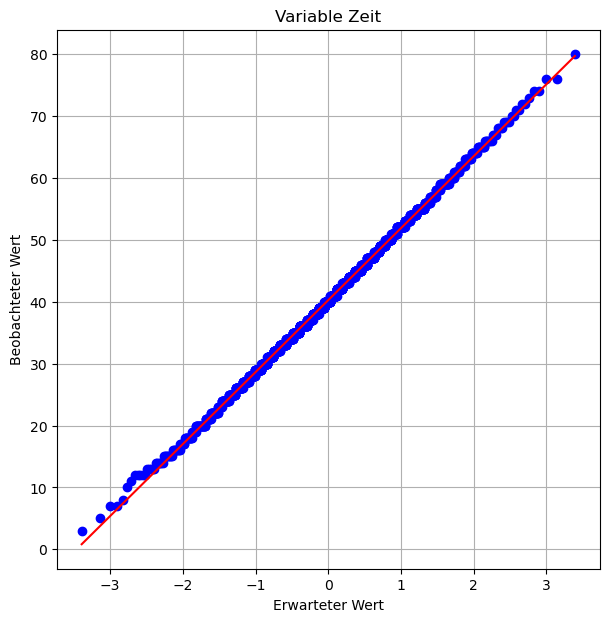

In [94]:
Zeit = merged_dp ["Zeit"] #Variable Zeit extrahieren

#Erstellung eines qq-Plots:
plt.figure (figsize=(7,7)) #Bestimmt die Größe
stats.probplot(Zeit, dist = "norm", plot=plt) #Erstellt qq-Plot
plt.title ("Variable Zeit") # Titelbeschriftung
plt.ylabel("Beobachteter Wert") #Y-Achse Beschriftung
plt.xlabel("Erwarteter Wert") #X-Achse Beschriftung
plt.grid (True) # Fügt ein Gitter hinzu
plt.show()

# Antwort Frage 13: Wie viele Kunden haben keinen Bankkredit aufgenommen, um das Auto zu kaufen? 

dp_1: Nur die Zeilen werden behalten bei denen der Wert in der Spalte "Einkommen" größer ist als der Wert in der Spalte "Preis". 

In [96]:
Kunde_ohne_Kredit = dp_1 [dp_1["Einkommen"]> dp_1["Preis"]]
Kunde_ohne_Kredit

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr
157,32,50330.0,49540.28,1,27.0,K0175
407,34,24264.0,22580.44,1,19.0,K0859
499,37,54403.0,53690.36,0,47.0,K0364
642,32,30856.0,27934.83,1,18.0,K0447
696,31,36296.0,35482.61,0,31.0,K0143


Wie man in der Tabelle erkennt, sind es 5 Personen die keinen Kredit bei der Bank genommen haben.

# Antwort Frage 14: Welche sind die sozioökonomischen Merkmale, die den Kaufpreis der Kunden beeinflussen? 

"smf.ols("Preis" ~ "Alter" + "Geschlecht" + "Einkommen" + "Zeit", data = merged_dp)" definiert das lineare Regressionsmodell mit Preis als abhängiger Variable und den Rest als unabhängige Variable.

In [100]:
model_1 = smf.ols("Preis ~ Alter + Geschlecht + Einkommen + Zeit", data = merged_dp)
result = model_1.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preis   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     1329.
Date:                Tue, 18 Jun 2024   Prob (F-statistic):               0.00
Time:                        12:37:23   Log-Likelihood:                -11748.
No. Observations:                1104   AIC:                         2.351e+04
Df Residuals:                    1099   BIC:                         2.353e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -132.5320   1531.939     -0.087      0.9